# Anime Reccomender System
In this notebook, we're going to create an Anime Reccomender System, which is based on collaborative filtering and content- based filetering model.
We will encounter this by following steps :
    1. Problem
    2. Data
    3. Features
## Problem Definition
 
When it comes to finding the perfect anime to watch, the process can be time-consuming and overwhelming. Scrolling through numerous options and searching for the right recommendation can be a daunting task. So, I was wondering if there is a way for me to obtain a list of anime recommendations that align with your personal preferences?

## Data

The dataset I have is sourced from the Kaggle Anime-Planet Recommendation Database 2020. It comprises information about 16,621 anime, including details like tags, synopsis, average score, and more. Additionally, it contains 175,731 recommendations made by 74,129 different users. The dataset also includes HTML files with anime information for data scraping purposes, such as reviews, staff details, statistics, genres, and more. Moreover, it provides the anime lists of individual users, encompassing categories like watched, want to watch, currently watching, dropped, stalled, and won't watch. Furthermore, the dataset includes user ratings for the animes they have completely watched. 
https://www.kaggle.com/datasets/hernan4444/animeplanet-recommendation-database-2020

## Features 

In this section, I will provide an overview of the data and present a data dictionary for the columns included in the Kaggle Anime-Planet Recommendation Database 2020 dataset.

The dataset consists of a wealth of information related to anime, totaling 16,621 unique entries. Each entry provides various details and attributes about an anime, allowing for comprehensive analysis and exploration. These details include information such as tags, synopsis, average score, and more.

`animelist.csv` have the list of all animes register by the user with the respective score, watching status and numbers of episodes watched. This dataset contains 20 Million row, 16.745 different animes and 74.129 different users. The file have the following columns:
* `user_id`: non identifiable randomly generated user id.
* `anime_id`: Anime-planet ID of the anime. (e.g. 1).
* `score`: score between 1 to 5 given by the user in scale of 0.5. 0 if the user didn't assign a score. (e.g. 3.5)
* `watching_status`: state ID from this anime in the anime list of this user. (e.g. 2)
* `watched_episodes`: numbers of episodes watched by the user. (e.g. 24)
* `watching_status.csv` describe every possible status of the column: "watching_status" in animelist.csv.

`rating_complete.csv` is a subset of animelist.csv. This dataset only considers animes that the user has watched completely `(watching_status==1)` and gave it a score `(score!=0)`. This dataset contains 8 Million ratings applied to 15.681 animes by 68.199 users. This file have the following columns:
* `user_id`: non identifiable randomly generated user id.
* `anime_id`: Anime-planet ID of the anime. (e.g. 1).
* `rating`: rating that this user has assigned.


`anime_recommendations.csv` have the list of all animes recommended given one anime. This information was scrapped from "recommendation" tab (e.g. https://www.anime-planet.com/anime/the-saints-magic-power-is-omnipotent/recommendations ). The file have the following columns:
* `Anime`: Anime Planet ID of the anime. (e.g. 1).
* `Recommendation`: Anime Planet ID of the recommended anime. (e.g. 1).
* `Agree Votes`: number of users that was agreed with the recommendation.


`anime.csv` contain general information of every anime (16.621 different anime) like Tags, type, studio, synopsis, etc. This file have the following columns:
* `Anime-PlanetID`: Anime Planet ID of the anime. (e.g. 1).
* `Name`: full name of the anime. (e.g. FLCL)
* `Alternative Name`: another way to call the anime. (e.g. Furi Kuri)
* `Rating Score`: average score of the anime given from all users in Anime Planet database. (e.g. 8.78)
* `Number Votes`: number of users who give a score to the anime. (e.g. 1241)
* `Tags`: comma separated list of tags for this anime. (e.g. Comedy, Mecha, Sci Fi, Outer Space, Original Work)
* `Content Warning`: comma separated list of content warning tags. (e.g. Explicit Violence, Mature Themes, Nudity)
* `Type`: TV, movie, OVA, etc. (e.g. TV).
* `Episodes`: number of chapters. (e.g. 26)
* `Finished`: True if the anime finished when I did the data scraping. False is the anime is on going in that moment.
* `Duration`: duration of the anime in minutes (e.g 60)
* `StartYear`: year when the anime start the transmission. (e.g. 2016)
* `EndYear`: year when the anime finish the transmission. (e.g. 2017)
* `Season`: season and year of release (e.g. Fall 2000)
* `Studios`: comma separated list of studios (e.g. Sunrise)
* `Synopsis`: synopsis of the anime
* `Url`: url to the main page of anime in Anime Planet (e.g. https://www.anime-planet.com/anime/vandread)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the CSV file

In [3]:
animelist_csv = pd.read_csv('Data/animelist.csv')
animelist_csv

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,7173,0.0,4,0
1,0,5323,0.0,2,1
2,0,5028,0.0,2,5
3,0,1048,0.0,4,0
4,0,12221,0.0,2,4
...,...,...,...,...,...
20842196,79300,3999,4.5,1,0
20842197,79300,8535,4.5,1,0
20842198,79300,6646,3.0,3,2
20842199,79300,5765,4.0,1,0


In [4]:
rating_csv = pd.read_csv('Data/rating_complete.csv')
rating_csv

,user_id,anime_id,rating
0,0,147,5.0
1,1,1512,4.5
2,1,599,4.0
3,1,2292,4.5
4,1,1078,3.0
...,...,...,...
8765940,79300,1496,4.0
8765941,79300,3999,4.5
8765942,79300,8535,4.5
8765943,79300,5765,4.0


In [5]:
watching_status_csv = pd.read_csv('Data/watching_status.csv')
watching_status_csv

,status,description
0,1,Watched
1,2,Watching
2,3,Dropped
3,4,Want to Watch
4,5,Stalled
5,6,Won't Watch


In [6]:
anime_reccomendations_csv = pd.read_csv('Data/anime_recommendations.csv')
anime_reccomendations_csv

,Anime,Recommendation,Agree Votes
0,10,172,9
1,10,4576,7
2,10,261,6
3,10,966,6
4,10,249,5
...,...,...,...
175726,9999,11732,0
175727,9999,14781,0
175728,9999,14829,0
175729,9999,9211,0


In [7]:
anime_csv = pd.read_csv('Data/anime.csv')
anime_csv

,Anime-PlanetID,Name,Alternative Name,Rating Score,Number Votes,Tags,Content Warning,Type,Episodes,Finished,Duration,StartYear,EndYear,Season,Studios,Synopsis,Url
0,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...
1,100,Neon Genesis Evangelion,Shinseiki Evangelion,4.248,54463,"Drama, Mecha, Sci Fi, Conspiracy, Kaijuu, Lone...","Emotional Abuse, Explicit Violence, Mature The...",TV,26,True,Unknown,1995,1996,Fall 1995,"GAINAX, Tatsunoko Production","In the future, a devastating event known as Se...",https://www.anime-planet.com/anime/neon-genesi...
2,1000,Full Metal Panic! The Second Raid,Unknown,4.35,23948,"Action, Comedy, Mecha, Sci Fi, Shounen, Milita...","Explicit Violence, Nudity",TV,13,True,Unknown,2005,2005,Summer 2005,Kyoto Animation,Half a year has passed since Sousuke Sagara to...,https://www.anime-planet.com/anime/full-metal-...
3,10000,22/7: Shampoo no Nioi ga Shita,Unknown,2.8,131,"Idols, School Life, CG Animation",Unknown,Music,1,True,5,2018,2018,Unknown,Unknown,The idol group 22/7 perform the song Shampoo n...,https://www.anime-planet.com/anime/22-7-shampo...
4,10001,Oshiri Tantei: Puputto Fumutto Kaiketsu Dance,Unknown,1.271,21,Family Friendly,Unknown,Web,1,True,2,2017,2017,Unknown,Toei Animation,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/oshiri-tant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16616,9995,Kitsunetsuki: Kedamonodamono,Unknown,2.32,96,Demons,Unknown,Music,1,True,4,2018,2018,Unknown,Unknown,The official music video for Killing Bites's e...,https://www.anime-planet.com/anime/kitsunetsuk...
16617,9996,Irodorimidori: Outsider Requiem,Unknown,2.277,63,"Idols, Music",Unknown,Music,1,True,2,2018,2018,Unknown,Unknown,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/irodorimido...
16618,9997,Kura Sushi,Unknown,3.087,45,"Coworkers, Food and Beverage, Promotional, Res...",Unknown,Web,2,True,4,2014,2016,Unknown,Unknown,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/kura-sushi
16619,9998,High School Fleet Movie,Haifuri Movie,3.912,148,"Action, Military, Military School, Ocean, Scho...",Unknown,Movie,1,True,103,2020,2020,Unknown,A-1 Pictures,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/high-school...


In [8]:
anime_csv['Anime-PlanetID'].value_counts()

10       1
4824     1
4792     1
4793     1
4794     1
        ..
15144    1
15145    1
15146    1
15147    1
9999     1
Name: Anime-PlanetID, Length: 16621, dtype: int64

In [9]:
anime_reccomendations_csv['Anime'].value_counts()

1048     132
1017     130
100      130
693      127
780      124
        ... 
13730      1
6427       1
12906      1
16465      1
11284      1
Name: Anime, Length: 14881, dtype: int64

In [10]:
anime_csv['Rating Score']

0        4.037
1        4.248
2         4.35
3          2.8
4        1.271
         ...  
16616     2.32
16617    2.277
16618    3.087
16619    3.912
16620    2.462
Name: Rating Score, Length: 16621, dtype: object

In [11]:
anime_csv.dtypes

Anime-PlanetID       int64
Name                object
Alternative Name    object
Rating Score        object
Number Votes        object
Tags                object
Content Warning     object
Type                object
Episodes            object
Finished              bool
Duration            object
StartYear           object
EndYear             object
Season              object
Studios             object
Synopsis            object
Url                 object
dtype: object

In [12]:
anime_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16621 entries, 0 to 16620
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Anime-PlanetID    16621 non-null  int64 
 1   Name              16621 non-null  object
 2   Alternative Name  16621 non-null  object
 3   Rating Score      16621 non-null  object
 4   Number Votes      16621 non-null  object
 5   Tags              16621 non-null  object
 6   Content Warning   16621 non-null  object
 7   Type              16621 non-null  object
 8   Episodes          16621 non-null  object
 9   Finished          16621 non-null  bool  
 10  Duration          16621 non-null  object
 11  StartYear         16621 non-null  object
 12  EndYear           16621 non-null  object
 13  Season            16621 non-null  object
 14  Studios           16621 non-null  object
 15  Synopsis          16615 non-null  object
 16  Url               16621 non-null  object
dtypes: bool(1), 

In [13]:
rating_csv

,user_id,anime_id,rating
0,0,147,5.0
1,1,1512,4.5
2,1,599,4.0
3,1,2292,4.5
4,1,1078,3.0
...,...,...,...
8765940,79300,1496,4.0
8765941,79300,3999,4.5
8765942,79300,8535,4.5
8765943,79300,5765,4.0


In [14]:
animelist_csv["anime_id"].value_counts()

1048     57718
5323     47477
22       45834
2360     42215
4472     40930
         ...  
17347        1
17346        1
17365        1
17354        1
17356        1
Name: anime_id, Length: 16745, dtype: int64

In [15]:
(animelist_csv['user_id']==0).sum()

9

In [16]:
(rating_csv['user_id']==0).sum()

1

In [17]:
rating_csv.shape

(8765945, 3)

In [18]:
anime_csv.shape

(16621, 17)

In [19]:
anime_csv

,Anime-PlanetID,Name,Alternative Name,Rating Score,Number Votes,Tags,Content Warning,Type,Episodes,Finished,Duration,StartYear,EndYear,Season,Studios,Synopsis,Url
0,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...
1,100,Neon Genesis Evangelion,Shinseiki Evangelion,4.248,54463,"Drama, Mecha, Sci Fi, Conspiracy, Kaijuu, Lone...","Emotional Abuse, Explicit Violence, Mature The...",TV,26,True,Unknown,1995,1996,Fall 1995,"GAINAX, Tatsunoko Production","In the future, a devastating event known as Se...",https://www.anime-planet.com/anime/neon-genesi...
2,1000,Full Metal Panic! The Second Raid,Unknown,4.35,23948,"Action, Comedy, Mecha, Sci Fi, Shounen, Milita...","Explicit Violence, Nudity",TV,13,True,Unknown,2005,2005,Summer 2005,Kyoto Animation,Half a year has passed since Sousuke Sagara to...,https://www.anime-planet.com/anime/full-metal-...
3,10000,22/7: Shampoo no Nioi ga Shita,Unknown,2.8,131,"Idols, School Life, CG Animation",Unknown,Music,1,True,5,2018,2018,Unknown,Unknown,The idol group 22/7 perform the song Shampoo n...,https://www.anime-planet.com/anime/22-7-shampo...
4,10001,Oshiri Tantei: Puputto Fumutto Kaiketsu Dance,Unknown,1.271,21,Family Friendly,Unknown,Web,1,True,2,2017,2017,Unknown,Toei Animation,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/oshiri-tant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16616,9995,Kitsunetsuki: Kedamonodamono,Unknown,2.32,96,Demons,Unknown,Music,1,True,4,2018,2018,Unknown,Unknown,The official music video for Killing Bites's e...,https://www.anime-planet.com/anime/kitsunetsuk...
16617,9996,Irodorimidori: Outsider Requiem,Unknown,2.277,63,"Idols, Music",Unknown,Music,1,True,2,2018,2018,Unknown,Unknown,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/irodorimido...
16618,9997,Kura Sushi,Unknown,3.087,45,"Coworkers, Food and Beverage, Promotional, Res...",Unknown,Web,2,True,4,2014,2016,Unknown,Unknown,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/kura-sushi
16619,9998,High School Fleet Movie,Haifuri Movie,3.912,148,"Action, Military, Military School, Ocean, Scho...",Unknown,Movie,1,True,103,2020,2020,Unknown,A-1 Pictures,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/high-school...


To ensure consistency and facilitate merging, it would be helpful to rename the `anime_id` column in the `rating_csv` to `Anime-PlanetID`. Since both columns represent the same information but are named differently in separate CSV files, renaming them will allow for seamless integration and merging of the datasets.

In [20]:
# Renaming the column
rating_csv = rating_csv.rename(columns={'anime_id':'Anime-PlanetID'})

In [21]:
# Merging the dataframe
anime_fulldata = pd.merge(anime_csv,rating_csv, on = 'Anime-PlanetID')
anime_fulldata.head()

,Anime-PlanetID,Name,Alternative Name,Rating Score,Number Votes,Tags,Content Warning,Type,Episodes,Finished,Duration,StartYear,EndYear,Season,Studios,Synopsis,Url,user_id,rating
0,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,34,4.0
1,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,106,5.0
2,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,132,4.5
3,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,212,4.5
4,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,247,4.5


In [22]:
anime_fulldata

,Anime-PlanetID,Name,Alternative Name,Rating Score,Number Votes,Tags,Content Warning,Type,Episodes,Finished,Duration,StartYear,EndYear,Season,Studios,Synopsis,Url,user_id,rating
0,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,34,4.0
1,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,106,5.0
2,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,132,4.5
3,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,212,4.5
4,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,247,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8765851,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,Unknown,2.462,24,"Drama, Promotional",Unknown,Web,1,True,2,2018,2018,Unknown,Unknown,"A mother is driving her son, Hiroki, to the ne...",https://www.anime-planet.com/anime/drive-agent...,56626,1.0
8765852,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,Unknown,2.462,24,"Drama, Promotional",Unknown,Web,1,True,2,2018,2018,Unknown,Unknown,"A mother is driving her son, Hiroki, to the ne...",https://www.anime-planet.com/anime/drive-agent...,66153,2.5
8765853,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,Unknown,2.462,24,"Drama, Promotional",Unknown,Web,1,True,2,2018,2018,Unknown,Unknown,"A mother is driving her son, Hiroki, to the ne...",https://www.anime-planet.com/anime/drive-agent...,70179,5.0
8765854,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,Unknown,2.462,24,"Drama, Promotional",Unknown,Web,1,True,2,2018,2018,Unknown,Unknown,"A mother is driving her son, Hiroki, to the ne...",https://www.anime-planet.com/anime/drive-agent...,73216,3.0


In [23]:
anime_fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8765856 entries, 0 to 8765855
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Anime-PlanetID    int64  
 1   Name              object 
 2   Alternative Name  object 
 3   Rating Score      object 
 4   Number Votes      object 
 5   Tags              object 
 6   Content Warning   object 
 7   Type              object 
 8   Episodes          object 
 9   Finished          bool   
 10  Duration          object 
 11  StartYear         object 
 12  EndYear           object 
 13  Season            object 
 14  Studios           object 
 15  Synopsis          object 
 16  Url               object 
 17  user_id           int64  
 18  rating            float64
dtypes: bool(1), float64(1), int64(2), object(15)
memory usage: 1.2+ GB


In [24]:
anime_fulldata['Anime-PlanetID'].value_counts()

1048     40675
5323     32990
93       27789
4472     27576
22       26809
         ...  
17047        1
17048        1
17049        1
16849        1
16970        1
Name: Anime-PlanetID, Length: 15659, dtype: int64

In [25]:
anime_fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8765856 entries, 0 to 8765855
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Anime-PlanetID    int64  
 1   Name              object 
 2   Alternative Name  object 
 3   Rating Score      object 
 4   Number Votes      object 
 5   Tags              object 
 6   Content Warning   object 
 7   Type              object 
 8   Episodes          object 
 9   Finished          bool   
 10  Duration          object 
 11  StartYear         object 
 12  EndYear           object 
 13  Season            object 
 14  Studios           object 
 15  Synopsis          object 
 16  Url               object 
 17  user_id           int64  
 18  rating            float64
dtypes: bool(1), float64(1), int64(2), object(15)
memory usage: 1.2+ GB


In [26]:
# Lets see the word colud for Genre/Tags
anime_fulldata

,Anime-PlanetID,Name,Alternative Name,Rating Score,Number Votes,Tags,Content Warning,Type,Episodes,Finished,Duration,StartYear,EndYear,Season,Studios,Synopsis,Url,user_id,rating
0,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,34,4.0
1,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,106,5.0
2,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,132,4.5
3,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,212,4.5
4,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,247,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8765851,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,Unknown,2.462,24,"Drama, Promotional",Unknown,Web,1,True,2,2018,2018,Unknown,Unknown,"A mother is driving her son, Hiroki, to the ne...",https://www.anime-planet.com/anime/drive-agent...,56626,1.0
8765852,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,Unknown,2.462,24,"Drama, Promotional",Unknown,Web,1,True,2,2018,2018,Unknown,Unknown,"A mother is driving her son, Hiroki, to the ne...",https://www.anime-planet.com/anime/drive-agent...,66153,2.5
8765853,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,Unknown,2.462,24,"Drama, Promotional",Unknown,Web,1,True,2,2018,2018,Unknown,Unknown,"A mother is driving her son, Hiroki, to the ne...",https://www.anime-planet.com/anime/drive-agent...,70179,5.0
8765854,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,Unknown,2.462,24,"Drama, Promotional",Unknown,Web,1,True,2,2018,2018,Unknown,Unknown,"A mother is driving her son, Hiroki, to the ne...",https://www.anime-planet.com/anime/drive-agent...,73216,3.0


### Word Cloud

In [27]:
# import sys
# !{sys.executable} -m pip install wordcloud

(-0.5, 3199.5, 1599.5, -0.5)

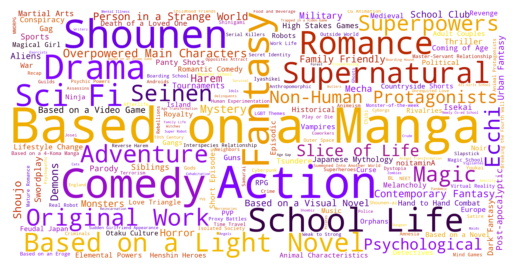

In [28]:
from collections import defaultdict

all_tags = defaultdict(int)

for tags in anime_fulldata['Tags']:
    for tag in tags.split(','):
        all_tags[tag.strip()] += 1

from wordcloud import WordCloud

tags_cloud = WordCloud(width = 3200, height = 1600, background_color = 'white', colormap = 'gnuplot').generate_from_frequencies(all_tags)
plt.imshow(tags_cloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 599.5, 299.5, -0.5)

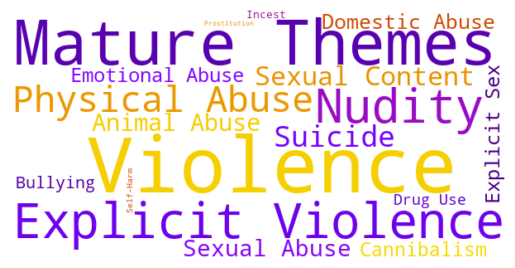

In [29]:
non_unknown_warning_anime = anime_fulldata[anime_fulldata['Content Warning']!='Unknown']
from collections import defaultdict

all_warnings = defaultdict(int)

for tags in non_unknown_warning_anime['Content Warning']:
    for tag in tags.split(','):
        all_warnings[tag.strip()] += 1

from wordcloud import WordCloud

tags_cloud = WordCloud(width = 600, height = 300, background_color = 'white', colormap = 'gnuplot').generate_from_frequencies(all_warnings)
plt.imshow(tags_cloud, interpolation='bilinear')
plt.axis('off')

### Top 10 anime on the basis of rating

In [30]:
anime_fulldata.columns

Index(['Anime-PlanetID', 'Name', 'Alternative Name', 'Rating Score',
       'Number Votes', 'Tags', 'Content Warning', 'Type', 'Episodes',
       'Finished', 'Duration', 'StartYear', 'EndYear', 'Season', 'Studios',
       'Synopsis', 'Url', 'user_id', 'rating'],
      dtype='object')

Text(0, 0.5, 'User Rating Count')

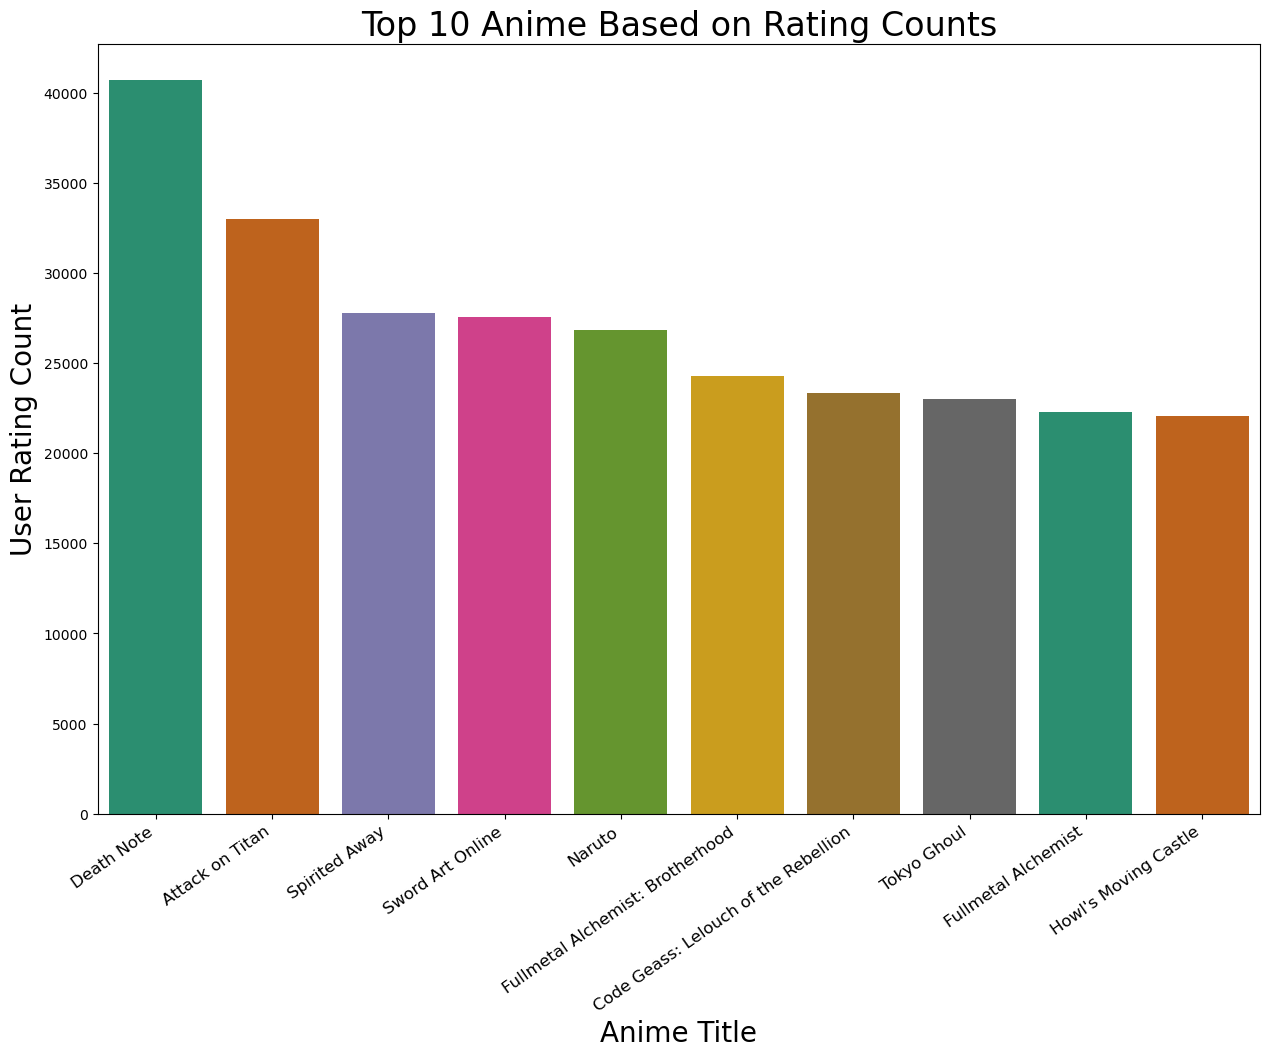

In [31]:
# Creating dataframe with no nan Name value
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['Name'])
# Creating dataframe for Anime Rating
anime_ratingCount = (combine_anime_rating.
            groupby(by = ['Name'])['rating'].
            count().
            reset_index().
            rename(columns={'rating' : 'totalRatingcount'}))
# Creating top 10 anime dataframe
top_10_anime = anime_ratingCount.sort_values(by = 'totalRatingcount', ascending = False).head(10)
# Plotting the top 10 anime by rating dataframe
plt.figure(figsize= (15,10))
ax = sns.barplot(x = 'Name', y='totalRatingcount', data = top_10_anime, palette='Dark2')
# Customizing the plot
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12, rotation = 35, ha = "right")
ax.set_title('Top 10 Anime Based on Rating Counts', fontsize = 24)
ax.set_xlabel('Anime Title', fontsize = 20)
ax.set_ylabel("User Rating Count", fontsize = 20)

### Medium Streaming distribution

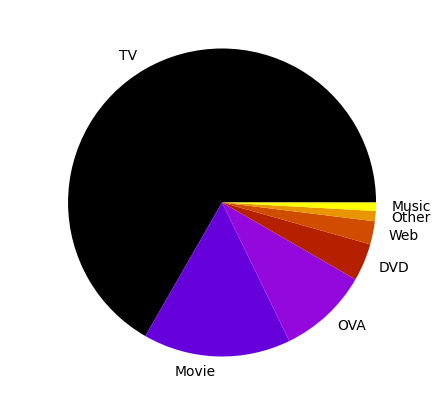

In [32]:
anime_fulldata['Type'].value_counts().plot.pie(figsize = (5,5), cmap = 'gnuplot');
plt.ylabel(' ');

## Data Preprocessing and preparation for model training

In [33]:
sub_animefulldata = anime_fulldata.copy()
sub_animefulldata

,Anime-PlanetID,Name,Alternative Name,Rating Score,Number Votes,Tags,Content Warning,Type,Episodes,Finished,Duration,StartYear,EndYear,Season,Studios,Synopsis,Url,user_id,rating
0,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,34,4.0
1,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,106,5.0
2,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,132,4.5
3,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,212,4.5
4,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,247,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8765851,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,Unknown,2.462,24,"Drama, Promotional",Unknown,Web,1,True,2,2018,2018,Unknown,Unknown,"A mother is driving her son, Hiroki, to the ne...",https://www.anime-planet.com/anime/drive-agent...,56626,1.0
8765852,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,Unknown,2.462,24,"Drama, Promotional",Unknown,Web,1,True,2,2018,2018,Unknown,Unknown,"A mother is driving her son, Hiroki, to the ne...",https://www.anime-planet.com/anime/drive-agent...,66153,2.5
8765853,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,Unknown,2.462,24,"Drama, Promotional",Unknown,Web,1,True,2,2018,2018,Unknown,Unknown,"A mother is driving her son, Hiroki, to the ne...",https://www.anime-planet.com/anime/drive-agent...,70179,5.0
8765854,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,Unknown,2.462,24,"Drama, Promotional",Unknown,Web,1,True,2,2018,2018,Unknown,Unknown,"A mother is driving her son, Hiroki, to the ne...",https://www.anime-planet.com/anime/drive-agent...,73216,3.0


In [34]:
# Lets replace the nan values of dataframe since there is only one column with such error
sub_animefulldata['Synopsis'].fillna('No Synopsis Available', inplace = True)

In [35]:
sub_animefulldata.isna().sum()

Anime-PlanetID      0
Name                0
Alternative Name    0
Rating Score        0
Number Votes        0
Tags                0
Content Warning     0
Type                0
Episodes            0
Finished            0
Duration            0
StartYear           0
EndYear             0
Season              0
Studios             0
Synopsis            0
Url                 0
user_id             0
rating              0
dtype: int64

Let's check out the counts of user id and filter based on

In [36]:
sub_animefulldata['user_id'].value_counts()

66153    15237
19269    12762
9055     11390
70179    10627
56411     9986
         ...  
1077         1
3146         1
10948        1
15111        1
14137        1
Name: user_id, Length: 68199, dtype: int64

Since we can see there are many users who has done rating only once, even if they rated 5, they can't be considered for recommendation, so I will take a minimum threshold of 500.

In [37]:
counts = sub_animefulldata['user_id'].value_counts()
sub_animefulldata = sub_animefulldata[sub_animefulldata['user_id'].isin(counts[counts>100].index)]
sub_animefulldata

,Anime-PlanetID,Name,Alternative Name,Rating Score,Number Votes,Tags,Content Warning,Type,Episodes,Finished,Duration,StartYear,EndYear,Season,Studios,Synopsis,Url,user_id,rating
2,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,132,4.5
4,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,247,4.5
6,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,289,4.5
7,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,322,3.5
8,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...,345,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8765851,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,Unknown,2.462,24,"Drama, Promotional",Unknown,Web,1,True,2,2018,2018,Unknown,Unknown,"A mother is driving her son, Hiroki, to the ne...",https://www.anime-planet.com/anime/drive-agent...,56626,1.0
8765852,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,Unknown,2.462,24,"Drama, Promotional",Unknown,Web,1,True,2,2018,2018,Unknown,Unknown,"A mother is driving her son, Hiroki, to the ne...",https://www.anime-planet.com/anime/drive-agent...,66153,2.5
8765853,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,Unknown,2.462,24,"Drama, Promotional",Unknown,Web,1,True,2,2018,2018,Unknown,Unknown,"A mother is driving her son, Hiroki, to the ne...",https://www.anime-planet.com/anime/drive-agent...,70179,5.0
8765854,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,Unknown,2.462,24,"Drama, Promotional",Unknown,Web,1,True,2,2018,2018,Unknown,Unknown,"A mother is driving her son, Hiroki, to the ne...",https://www.anime-planet.com/anime/drive-agent...,73216,3.0


To leverage the benefits of cosine-based recommendation systems, it is advantageous to transform your dataset into a pivot table format. Pivot tables are particularly useful when dealing with user-item interactions or preferences. In this type of dataset, each row represents a unique user-item pair, while the values indicate the level of interaction or preference.

In [38]:
anime_pivot = sub_animefulldata.pivot_table(index = ['Anime-PlanetID','Name'], columns='user_id', values = 'rating').fillna(0)
anime_pivot

,user_id,1,2,5,6,8,9,10,20,25,26,...,79264,79266,79268,79272,79276,79278,79281,79294,79297,79300
Anime-PlanetID,Name,,,,,,,,,,,,,,,,,,,,,
2,Vandread,0.0,0.0,0.0,0.0,4.0,0.0,2.0,4.0,3.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Legend of Black Heaven,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Fist of the North Star,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Saiyuki,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,FLCL,0.5,0.0,0.0,4.5,5.0,1.0,5.0,0.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17129,Ryokuoushoku Shakai: Natsu wo Ikiru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17130,Totsuzen GIRL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17131,Hajimari wa Kimi no Sora,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Building
### Collaborative Filtering

In [39]:
 %%time
from scipy.sparse import csr_matrix

anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

CPU times: user 4.15 s, sys: 1.34 s, total: 5.49 s
Wall time: 6.35 s


NearestNeighbors(algorithm='brute', metric='cosine')

Now we've fitted our model let's get some reccomendation for our anime

In [40]:
anime_pivot.shape[0]

15659

In [41]:
anime_pivot.iloc[12770,:].values.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [42]:
query_index = np.random.choice(anime_pivot.shape[0])
print(query_index)
distance, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 8)

14432


In [43]:
indices.flatten().dtype

dtype('int64')

In [44]:
def get_anime_recc_coll(name):
    query_index = 0
    for i in np.array(list(anime_pivot.index))[:,-1]:
        if name == i:
            break
        else:
            query_index+=1
    distance, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 11)
    anime_indices = []
    for i in range(0, len(indices.flatten())):
        if(i==0):
            print("The Reccomendation for {0} are : ".format(anime_pivot.index[query_index][1]))
        else:
            print("{0}:{1} with score of {2}.".format(i, anime_pivot.index[indices.flatten()[i]][1],distance.flatten()[i]))
            anime_indices.append(anime_pivot.index[indices.flatten()[i]][0])
    for i in anime_indices:
        anime_csv[anime_csv['Anime-PlanetID']==i]

In [45]:
distance, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 11)
anime_indices = []
for i in range(0, len(indices.flatten())):
    if(i==0):
        print("The Reccomendation for {0} are : ".format(anime_pivot.index[query_index][1]))
    else:
        print("{0}:{1} with score of {2}.".format(i, anime_pivot.index[indices.flatten()[i]][1],distance.flatten()[i]))
        anime_indices.append(anime_pivot.index[indices.flatten()[i]][0])
anime_indices

The Reccomendation for Macross Frontier: Gooorgeous are : 
1:Akai Hana Shiroi Hana with score of 0.37216703881483104.
2:Dallyeola Majing-ga-X with score of 0.3782299957827412.
3:Yatterman x Toshiba with score of 0.386348551408519.
4:Dr. Slump: Arale-chan no Koutsuu Anzen with score of 0.3938967818010606.
5:Bokutachi no Kizuki with score of 0.3992562370524524.
6:Hikari: Kariya wo Tsunagu Monogatari with score of 0.40196371411303744.
7:Lord of Vermilion III Special Anime Movie with score of 0.42083967444902803.
8:RahXephon: Ichiko Hashimoto - The Fate of Katun with score of 0.4218549395263499.
9:Yuuki no Hana ga Hiraku Toki: Yanase Takashi to Anpanman no Monogatari with score of 0.42499999999999993.
10:Yuyoyuppe: Who am I? with score of 0.4284448777834645.


[14704, 15597, 15316, 15556, 15412, 13903, 15095, 15365, 14791, 15469]

In [46]:
anime_indices

[14704, 15597, 15316, 15556, 15412, 13903, 15095, 15365, 14791, 15469]

In [47]:
anime_csv[anime_csv['Anime-PlanetID']==12789]

,Anime-PlanetID,Name,Alternative Name,Rating Score,Number Votes,Tags,Content Warning,Type,Episodes,Finished,Duration,StartYear,EndYear,Season,Studios,Synopsis,Url
2979,12789,How Heavy Are the Dumbbells You Lift?,Dumbbell Nan Kilo Moteru?,3.911,4382,"Comedy, Ecchi, Educational, Gyaru, Based on a ...",Unknown,TV,12,True,Unknown,2019,2019,Summer 2019,Doga Kobo,Hibiki Sakura’s love for food is starting to a...,https://www.anime-planet.com/anime/how-heavy-a...


In [48]:
get_anime_recc_coll('High School DxD')

The Reccomendation for High School DxD are : 
1:High School DxD NEW with score of 0.17070692008996546.
2:High School DxD BorN with score of 0.281338974471833.
3:Date a Live with score of 0.370517737783984.
4:Highschool of the Dead with score of 0.37325319879224494.
5:Sword Art Online with score of 0.3735985416208697.
6:No Game No Life with score of 0.395736121519519.
7:Demon King Daimao with score of 0.40119974663910396.
8:Infinite Stratos with score of 0.40360866897368486.
9:Aesthetica of a Rogue Hero with score of 0.4120150774033625.
10:The Testament of Sister New Devil with score of 0.41490445027829337.


In [49]:
len(np.array(list(anime_pivot.index))[:,-1])

15659

In [50]:
get_anime_recc_coll('Monster')

The Reccomendation for Monster are : 
1:Baccano! with score of 0.5927791823981792.
2:Cowboy Bebop with score of 0.600746753595429.
3:Death Note with score of 0.6162522059222713.
4:Mushishi with score of 0.6197275581526969.
5:Steins;Gate with score of 0.621786498655025.
6:Berserk with score of 0.624255078587255.
7:Code Geass: Lelouch of the Rebellion with score of 0.6255503801038858.
8:Welcome to the NHK! with score of 0.6266842949563158.
9:Code Geass: Lelouch of the Rebellion R2 with score of 0.6300607856671239.
10:Samurai Champloo with score of 0.6314545985161446.


We can see that there are a lot of anime with Content Warning 'unknown' so therefore we have to create model on two different scenario

### Content Based Reccomendation

In [51]:
anime_csv

,Anime-PlanetID,Name,Alternative Name,Rating Score,Number Votes,Tags,Content Warning,Type,Episodes,Finished,Duration,StartYear,EndYear,Season,Studios,Synopsis,Url
0,10,The Prince of Tennis,Tennis no Ouji-sama,4.037,10889,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,TV,178,True,Unknown,2001,2005,Fall 2001,"Production I.G, Trans Arts","Meet Ryoma Echizen, the cocky prince of tennis...",https://www.anime-planet.com/anime/the-prince-...
1,100,Neon Genesis Evangelion,Shinseiki Evangelion,4.248,54463,"Drama, Mecha, Sci Fi, Conspiracy, Kaijuu, Lone...","Emotional Abuse, Explicit Violence, Mature The...",TV,26,True,Unknown,1995,1996,Fall 1995,"GAINAX, Tatsunoko Production","In the future, a devastating event known as Se...",https://www.anime-planet.com/anime/neon-genesi...
2,1000,Full Metal Panic! The Second Raid,Unknown,4.35,23948,"Action, Comedy, Mecha, Sci Fi, Shounen, Milita...","Explicit Violence, Nudity",TV,13,True,Unknown,2005,2005,Summer 2005,Kyoto Animation,Half a year has passed since Sousuke Sagara to...,https://www.anime-planet.com/anime/full-metal-...
3,10000,22/7: Shampoo no Nioi ga Shita,Unknown,2.8,131,"Idols, School Life, CG Animation",Unknown,Music,1,True,5,2018,2018,Unknown,Unknown,The idol group 22/7 perform the song Shampoo n...,https://www.anime-planet.com/anime/22-7-shampo...
4,10001,Oshiri Tantei: Puputto Fumutto Kaiketsu Dance,Unknown,1.271,21,Family Friendly,Unknown,Web,1,True,2,2017,2017,Unknown,Toei Animation,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/oshiri-tant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16616,9995,Kitsunetsuki: Kedamonodamono,Unknown,2.32,96,Demons,Unknown,Music,1,True,4,2018,2018,Unknown,Unknown,The official music video for Killing Bites's e...,https://www.anime-planet.com/anime/kitsunetsuk...
16617,9996,Irodorimidori: Outsider Requiem,Unknown,2.277,63,"Idols, Music",Unknown,Music,1,True,2,2018,2018,Unknown,Unknown,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/irodorimido...
16618,9997,Kura Sushi,Unknown,3.087,45,"Coworkers, Food and Beverage, Promotional, Res...",Unknown,Web,2,True,4,2014,2016,Unknown,Unknown,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/kura-sushi
16619,9998,High School Fleet Movie,Haifuri Movie,3.912,148,"Action, Military, Military School, Ocean, Scho...",Unknown,Movie,1,True,103,2020,2020,Unknown,A-1 Pictures,No synopsis yet - check back soon!,https://www.anime-planet.com/anime/high-school...


now let's skim out the important columns that can affect the reccomendations

In [52]:
anime_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16621 entries, 0 to 16620
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Anime-PlanetID    16621 non-null  int64 
 1   Name              16621 non-null  object
 2   Alternative Name  16621 non-null  object
 3   Rating Score      16621 non-null  object
 4   Number Votes      16621 non-null  object
 5   Tags              16621 non-null  object
 6   Content Warning   16621 non-null  object
 7   Type              16621 non-null  object
 8   Episodes          16621 non-null  object
 9   Finished          16621 non-null  bool  
 10  Duration          16621 non-null  object
 11  StartYear         16621 non-null  object
 12  EndYear           16621 non-null  object
 13  Season            16621 non-null  object
 14  Studios           16621 non-null  object
 15  Synopsis          16615 non-null  object
 16  Url               16621 non-null  object
dtypes: bool(1), 

In [53]:
# Anime-PlanetID
# Name
# Tags
# Content Warning
# Synopsis
# Type

In [54]:
content_anime = anime_csv[['Anime-PlanetID','Name','Tags','Content Warning','Synopsis','Type']]
content_anime

,Anime-PlanetID,Name,Tags,Content Warning,Synopsis,Type
0,10,The Prince of Tennis,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",Unknown,"Meet Ryoma Echizen, the cocky prince of tennis...",TV
1,100,Neon Genesis Evangelion,"Drama, Mecha, Sci Fi, Conspiracy, Kaijuu, Lone...","Emotional Abuse, Explicit Violence, Mature The...","In the future, a devastating event known as Se...",TV
2,1000,Full Metal Panic! The Second Raid,"Action, Comedy, Mecha, Sci Fi, Shounen, Milita...","Explicit Violence, Nudity",Half a year has passed since Sousuke Sagara to...,TV
3,10000,22/7: Shampoo no Nioi ga Shita,"Idols, School Life, CG Animation",Unknown,The idol group 22/7 perform the song Shampoo n...,Music
4,10001,Oshiri Tantei: Puputto Fumutto Kaiketsu Dance,Family Friendly,Unknown,No synopsis yet - check back soon!,Web
...,...,...,...,...,...,...
16616,9995,Kitsunetsuki: Kedamonodamono,Demons,Unknown,The official music video for Killing Bites's e...,Music
16617,9996,Irodorimidori: Outsider Requiem,"Idols, Music",Unknown,No synopsis yet - check back soon!,Music
16618,9997,Kura Sushi,"Coworkers, Food and Beverage, Promotional, Res...",Unknown,No synopsis yet - check back soon!,Web
16619,9998,High School Fleet Movie,"Action, Military, Military School, Ocean, Scho...",Unknown,No synopsis yet - check back soon!,Movie


In [55]:
content_anime.isnull().sum()

Anime-PlanetID     0
Name               0
Tags               0
Content Warning    0
Synopsis           6
Type               0
dtype: int64

Here we will first combine all the Tags, Content Warnings, Synopsis and Type into one tag so ad to perform operations,
firstly we will replace unknown with blank.

In [56]:
content_anime['Content Warning'].replace({'Unknown':""}, inplace = True)

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_96671/1156321203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_anime['Content Warning'].replace({'Unknown':""}, inplace = True)


In [57]:
content_anime['Tags'].replace({'Unknown':""}, inplace = True)

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_96671/3691856405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_anime['Tags'].replace({'Unknown':""}, inplace = True)


In [58]:
content_anime

,Anime-PlanetID,Name,Tags,Content Warning,Synopsis,Type
0,10,The Prince of Tennis,"Comedy, Drama, Shounen, Sports, Tennis, Based ...",,"Meet Ryoma Echizen, the cocky prince of tennis...",TV
1,100,Neon Genesis Evangelion,"Drama, Mecha, Sci Fi, Conspiracy, Kaijuu, Lone...","Emotional Abuse, Explicit Violence, Mature The...","In the future, a devastating event known as Se...",TV
2,1000,Full Metal Panic! The Second Raid,"Action, Comedy, Mecha, Sci Fi, Shounen, Milita...","Explicit Violence, Nudity",Half a year has passed since Sousuke Sagara to...,TV
3,10000,22/7: Shampoo no Nioi ga Shita,"Idols, School Life, CG Animation",,The idol group 22/7 perform the song Shampoo n...,Music
4,10001,Oshiri Tantei: Puputto Fumutto Kaiketsu Dance,Family Friendly,,No synopsis yet - check back soon!,Web
...,...,...,...,...,...,...
16616,9995,Kitsunetsuki: Kedamonodamono,Demons,,The official music video for Killing Bites's e...,Music
16617,9996,Irodorimidori: Outsider Requiem,"Idols, Music",,No synopsis yet - check back soon!,Music
16618,9997,Kura Sushi,"Coworkers, Food and Beverage, Promotional, Res...",,No synopsis yet - check back soon!,Web
16619,9998,High School Fleet Movie,"Action, Military, Military School, Ocean, Scho...",,No synopsis yet - check back soon!,Movie


In [59]:
content_anime['Content Warning'].value_counts()

                                                                                             14933
Violence                                                                                       473
Nudity                                                                                         253
Explicit Violence                                                                              122
Explicit Sex                                                                                    75
                                                                                             ...  
Emotional Abuse, Explicit Violence, Mature Themes, Physical Abuse, Suicide                       1
Animal Abuse, Bullying, Mature Themes, Physical Abuse                                            1
Cannibalism, Explicit Sex, Explicit Violence, Mature Themes, Physical Abuse, Sexual Abuse        1
Mature Themes, Nudity, Violence                                                                  1
Animal Abu

In [60]:
content_anime['Synopsis'].fillna("", inplace = True)

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_96671/185177608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_anime['Synopsis'].fillna("", inplace = True)


In [61]:
content_anime.isnull().sum()

Anime-PlanetID     0
Name               0
Tags               0
Content Warning    0
Synopsis           0
Type               0
dtype: int64

Since the unknown values has been handled let's create our tag column

In [62]:
def convert(obj):
     return obj.split(",")

In [63]:
content_anime['Tags'] = content_anime['Tags'].apply(convert)
content_anime["Content Warning"] = content_anime["Content Warning"].apply(convert)
content_anime['Type'] = content_anime['Type'].apply(convert)

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_96671/3587261846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_anime['Tags'] = content_anime['Tags'].apply(convert)
/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_96671/3587261846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_anime["Content Warning"] = content_anime["Content Warning"].apply(convert)
/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_96671/3587261846.py:3: SettingWithCopyWarning: 
A val

In [75]:
def convert_syno(obj):
    return (obj.split(" "))

In [65]:
content_anime['Synopsis']=content_anime['Synopsis'].apply(convert_syno)

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_96671/1742083071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_anime['Synopsis']=content_anime['Synopsis'].apply(convert_syno)


In [66]:
content_anime

,Anime-PlanetID,Name,Tags,Content Warning,Synopsis,Type
0,10,The Prince of Tennis,"[Comedy, Drama, Shounen, Sports, Tennis, ...",[],"[Meet, Ryoma, Echizen,, the, cocky, prince, of...",[TV]
1,100,Neon Genesis Evangelion,"[Drama, Mecha, Sci Fi, Conspiracy, Kaijuu,...","[Emotional Abuse, Explicit Violence, Mature ...","[In, the, future,, a, devastating, event, know...",[TV]
2,1000,Full Metal Panic! The Second Raid,"[Action, Comedy, Mecha, Sci Fi, Shounen, ...","[Explicit Violence, Nudity]","[Half, a, year, has, passed, since, Sousuke, S...",[TV]
3,10000,22/7: Shampoo no Nioi ga Shita,"[Idols, School Life, CG Animation]",[],"[The, idol, group, 22/7, perform, the, song, S...",[Music]
4,10001,Oshiri Tantei: Puputto Fumutto Kaiketsu Dance,[Family Friendly],[],"[No, synopsis, yet, -, check, back, soon!]",[Web]
...,...,...,...,...,...,...
16616,9995,Kitsunetsuki: Kedamonodamono,[Demons],[],"[The, official, music, video, for, Killing, Bi...",[Music]
16617,9996,Irodorimidori: Outsider Requiem,"[Idols, Music]",[],"[No, synopsis, yet, -, check, back, soon!]",[Music]
16618,9997,Kura Sushi,"[Coworkers, Food and Beverage, Promotional, ...",[],"[No, synopsis, yet, -, check, back, soon!]",[Web]
16619,9998,High School Fleet Movie,"[Action, Military, Military School, Ocean, ...",[],"[No, synopsis, yet, -, check, back, soon!]",[Movie]


In [67]:
content_anime['Tags']=content_anime["Tags"].apply(lambda x:[i.replace(" ","").lower() for i in x])
content_anime['Content Warning']=content_anime["Content Warning"].apply(lambda x:[i.replace(" ","").lower() for i in x])
content_anime['Synopsis']=content_anime["Synopsis"].apply(lambda x:[i.replace(" ","").lower() for i in x])
content_anime['Type']=content_anime["Type"].apply(lambda x:[i.replace(" ","").lower() for i in x])

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_96671/1454002397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_anime['Tags']=content_anime["Tags"].apply(lambda x:[i.replace(" ","").lower() for i in x])
/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_96671/1454002397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_anime['Content Warning']=content_anime["Content Warning"].apply(lambda x:[i.replace(" ","").lower() for i in x])
/var/folders/x5/z5cwd1cx4wzdf6bwhq_b

In [68]:
content_anime["tag"] = content_anime["Tags"] + content_anime["Content Warning"] + content_anime["Type"] + content_anime["Synopsis"]

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_96671/202990188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_anime["tag"] = content_anime["Tags"] + content_anime["Content Warning"] + content_anime["Type"] + content_anime["Synopsis"]


In [69]:
content_anime

,Anime-PlanetID,Name,Tags,Content Warning,Synopsis,Type,tag
0,10,The Prince of Tennis,"[comedy, drama, shounen, sports, tennis, based...",[],"[meet, ryoma, echizen,, the, cocky, prince, of...",[tv],"[comedy, drama, shounen, sports, tennis, based..."
1,100,Neon Genesis Evangelion,"[drama, mecha, scifi, conspiracy, kaijuu, lone...","[emotionalabuse, explicitviolence, maturetheme...","[in, the, future,, a, devastating, event, know...",[tv],"[drama, mecha, scifi, conspiracy, kaijuu, lone..."
2,1000,Full Metal Panic! The Second Raid,"[action, comedy, mecha, scifi, shounen, milita...","[explicitviolence, nudity]","[half, a, year, has, passed, since, sousuke, s...",[tv],"[action, comedy, mecha, scifi, shounen, milita..."
3,10000,22/7: Shampoo no Nioi ga Shita,"[idols, schoollife, cganimation]",[],"[the, idol, group, 22/7, perform, the, song, s...",[music],"[idols, schoollife, cganimation, , music, the,..."
4,10001,Oshiri Tantei: Puputto Fumutto Kaiketsu Dance,[familyfriendly],[],"[no, synopsis, yet, -, check, back, soon!]",[web],"[familyfriendly, , web, no, synopsis, yet, -, ..."
...,...,...,...,...,...,...,...
16616,9995,Kitsunetsuki: Kedamonodamono,[demons],[],"[the, official, music, video, for, killing, bi...",[music],"[demons, , music, the, official, music, video,..."
16617,9996,Irodorimidori: Outsider Requiem,"[idols, music]",[],"[no, synopsis, yet, -, check, back, soon!]",[music],"[idols, music, , music, no, synopsis, yet, -, ..."
16618,9997,Kura Sushi,"[coworkers, foodandbeverage, promotional, rest...",[],"[no, synopsis, yet, -, check, back, soon!]",[web],"[coworkers, foodandbeverage, promotional, rest..."
16619,9998,High School Fleet Movie,"[action, military, militaryschool, ocean, scho...",[],"[no, synopsis, yet, -, check, back, soon!]",[movie],"[action, military, militaryschool, ocean, scho..."


In [70]:
new_df = content_anime[['Anime-PlanetID','Name', 'tag']]
new_df

,Anime-PlanetID,Name,tag
0,10,The Prince of Tennis,"[comedy, drama, shounen, sports, tennis, based..."
1,100,Neon Genesis Evangelion,"[drama, mecha, scifi, conspiracy, kaijuu, lone..."
2,1000,Full Metal Panic! The Second Raid,"[action, comedy, mecha, scifi, shounen, milita..."
3,10000,22/7: Shampoo no Nioi ga Shita,"[idols, schoollife, cganimation, , music, the,..."
4,10001,Oshiri Tantei: Puputto Fumutto Kaiketsu Dance,"[familyfriendly, , web, no, synopsis, yet, -, ..."
...,...,...,...
16616,9995,Kitsunetsuki: Kedamonodamono,"[demons, , music, the, official, music, video,..."
16617,9996,Irodorimidori: Outsider Requiem,"[idols, music, , music, no, synopsis, yet, -, ..."
16618,9997,Kura Sushi,"[coworkers, foodandbeverage, promotional, rest..."
16619,9998,High School Fleet Movie,"[action, military, militaryschool, ocean, scho..."


In [71]:
new_df['tag']=new_df['tag'].apply(lambda x:" ".join(x))

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_96671/4079141722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag']=new_df['tag'].apply(lambda x:" ".join(x))


In [72]:
new_df

,Anime-PlanetID,Name,tag
0,10,The Prince of Tennis,comedy drama shounen sports tennis basedonaman...
1,100,Neon Genesis Evangelion,drama mecha scifi conspiracy kaijuu loneliness...
2,1000,Full Metal Panic! The Second Raid,action comedy mecha scifi shounen military rea...
3,10000,22/7: Shampoo no Nioi ga Shita,idols schoollife cganimation music the idol g...
4,10001,Oshiri Tantei: Puputto Fumutto Kaiketsu Dance,familyfriendly web no synopsis yet - check ba...
...,...,...,...
16616,9995,Kitsunetsuki: Kedamonodamono,demons music the official music video for kil...
16617,9996,Irodorimidori: Outsider Requiem,idols music music no synopsis yet - check bac...
16618,9997,Kura Sushi,coworkers foodandbeverage promotional restaura...
16619,9998,High School Fleet Movie,action military militaryschool ocean schoollif...


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None,
                     strip_accents='unicode', analyzer = 'word', ngram_range=(1,3),
                     stop_words='english')
tag_str = new_df['tag'].astype(str)
tfv_matrix = tfv.fit_transform(tag_str)

In [74]:
tfv_matrix.shape

(16621, 32752)

In [75]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [76]:
indices = pd.Series(anime_csv.index, index=anime_csv['Name']).drop_duplicates()

In [77]:
def give_rec_con(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': anime_csv['Name'].iloc[anime_indices].values,
                                 'Rating': anime_csv['Rating Score'].iloc[anime_indices].values,
                           'Synopsis':anime_csv["Synopsis"].iloc[anime_indices].values})

In [78]:
give_rec_con('Monster')

,Anime name,Rating,Synopsis
0,School Rumble San Gakki,3.966,Love is in the air once more! As the last day ...
1,Monster Extra,3.49,A recap episode that covers episode 1-17 of Mo...
2,Astro Boy (1980),3.114,Dr. Tenma is obsessed with creating a robot wi...
3,Atom: The Beginning,3.4,"After a great calamity in Japan, the world nee..."
4,School Rumble,4.145,"Tenma Tsukamoto is young, bright, and smitten ..."
5,Astro Boy (2003),3.037,"After a horrific car crash, Dr Tenma lost his ..."
6,Inazuma Eleven GO: Chrono Stone,3.75,A few months after the conclusion of Holy Road...
7,Young Black Jack,3.69,"The year is 1968, the war in Vietnam is approa..."
8,Dies irae: The Dawning Days,1.967,"At the start of a great war, an important lead..."
9,ID:INVADED,4.203,Sakaido was a famous and very talented detecti...


In [79]:
get_anime_recc_coll("Baccano!")

The Reccomendation for Baccano! are : 
1:Baccano! Specials with score of 0.3047279406775182.
2:Durarara!! with score of 0.4629146997892055.
3:Cowboy Bebop with score of 0.4828905533027533.
4:Darker than Black with score of 0.4999610247943711.
5:Black Lagoon with score of 0.5057691916722551.
6:Code Geass: Lelouch of the Rebellion with score of 0.5064062688971692.
7:Tengen Toppa Gurren Lagann with score of 0.5128264269996372.
8:Samurai Champloo with score of 0.5141205222493136.
9:Steins;Gate with score of 0.5160755189967656.
10:Code Geass: Lelouch of the Rebellion R2 with score of 0.5191446173770029.


In [1]:
import pickle
pickle.dump(indices,open('indices.pkl','wb'))

NameError: name 'indices' is not defined

In [ ]:
pickle.dump(sig, open('sig.pkl','wb'))


In [ ]:
pickle.dump(anime_csv, open('anime_csv.pkl', 'wb'))

In [22]:
import pandas as pd

In [23]:
anime_csv= pd.read_csv(
    'artifacts/data/data.csv'
)

In [24]:
anime_csv

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,无脑魔女,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",...,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,The First Order,第一序列,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",...,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1931/...


In [25]:
anime_csv.isna().sum()

anime_id        0
Name            0
English name    0
Other name      0
Score           0
Genres          0
Synopsis        0
Type            0
Episodes        0
Aired           0
Premiered       0
Status          0
Producers       0
Licensors       0
Studios         0
Source          0
Duration        0
Rating          0
Rank            0
Popularity      0
Favorites       0
Scored By       0
Members         0
Image URL       0
dtype: int64

In [26]:
anime_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [27]:
content_anime = anime_csv[['anime_id','Name','Producers','Licensors','Synopsis','Type', 'Source', 'Studios', 'Genres', 'Rating']]
content_anime

,anime_id,Name,Producers,Licensors,Synopsis,Type,Source,Studios,Genres,Rating
0,1,Cowboy Bebop,Bandai Visual,"Funimation, Bandai Entertainment","Crime is timeless. By the year 2071, humanity ...",TV,Original,Sunrise,"Action, Award Winning, Sci-Fi",R - 17+ (violence & profanity)
1,5,Cowboy Bebop: Tengoku no Tobira,"Sunrise, Bandai Visual",Sony Pictures Entertainment,"Another day, another bounty—such is the life o...",Movie,Original,Bones,"Action, Sci-Fi",R - 17+ (violence & profanity)
2,6,Trigun,Victor Entertainment,"Funimation, Geneon Entertainment USA","Vash the Stampede is the man with a $$60,000,0...",TV,Manga,Madhouse,"Action, Adventure, Sci-Fi",PG-13 - Teens 13 or older
3,7,Witch Hunter Robin,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Robin Sena is a powerful craft user drafted in...,TV,Original,Sunrise,"Action, Drama, Mystery, Supernatural",PG-13 - Teens 13 or older
4,8,Bouken Ou Beet,"TV Tokyo, Dentsu",Illumitoon Entertainment,It is the dark century and the people are suff...,TV,Manga,Toei Animation,"Adventure, Fantasy, Supernatural",PG - Children
...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,UNKNOWN,No description available for this anime.,ONA,Web manga,UNKNOWN,"Comedy, Fantasy, Slice of Life",PG-13 - Teens 13 or older
24901,55732,Bu Xing Si: Yuan Qi,UNKNOWN,UNKNOWN,No description available for this anime.,ONA,Web novel,UNKNOWN,"Action, Adventure, Fantasy",PG-13 - Teens 13 or older
24902,55733,Di Yi Xulie,UNKNOWN,UNKNOWN,No description available for this anime.,ONA,Web novel,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",PG-13 - Teens 13 or older
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,Original,UNKNOWN,UNKNOWN,PG-13 - Teens 13 or older


In [28]:
def convert(obj):
     return obj.split(",")
def convert_syno(obj):
    return (obj.split(" "))

In [29]:
cols = ['Producers', 'Licensors', 'Type', 'Source', 'Studios', 'Genres', 'Rating']

In [30]:
for col in cols:
    content_anime[col].replace({'UNKNOWN':""}, inplace = True)

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_57411/3152051186.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  content_anime[col].replace({'UNKNOWN':""}, inplace = True)
/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_57411/3152051186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_anime[col].replace({'U

In [31]:
content_anime['Synopsis'].replace({'No description available for this anime.': ""}, inplace=True)

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_57411/785811624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  content_anime['Synopsis'].replace({'No description available for this anime.': ""}, inplace=True)
/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_57411/785811624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [32]:
content_anime

,anime_id,Name,Producers,Licensors,Synopsis,Type,Source,Studios,Genres,Rating
0,1,Cowboy Bebop,Bandai Visual,"Funimation, Bandai Entertainment","Crime is timeless. By the year 2071, humanity ...",TV,Original,Sunrise,"Action, Award Winning, Sci-Fi",R - 17+ (violence & profanity)
1,5,Cowboy Bebop: Tengoku no Tobira,"Sunrise, Bandai Visual",Sony Pictures Entertainment,"Another day, another bounty—such is the life o...",Movie,Original,Bones,"Action, Sci-Fi",R - 17+ (violence & profanity)
2,6,Trigun,Victor Entertainment,"Funimation, Geneon Entertainment USA","Vash the Stampede is the man with a $$60,000,0...",TV,Manga,Madhouse,"Action, Adventure, Sci-Fi",PG-13 - Teens 13 or older
3,7,Witch Hunter Robin,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Robin Sena is a powerful craft user drafted in...,TV,Original,Sunrise,"Action, Drama, Mystery, Supernatural",PG-13 - Teens 13 or older
4,8,Bouken Ou Beet,"TV Tokyo, Dentsu",Illumitoon Entertainment,It is the dark century and the people are suff...,TV,Manga,Toei Animation,"Adventure, Fantasy, Supernatural",PG - Children
...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,,,,ONA,Web manga,,"Comedy, Fantasy, Slice of Life",PG-13 - Teens 13 or older
24901,55732,Bu Xing Si: Yuan Qi,,,,ONA,Web novel,,"Action, Adventure, Fantasy",PG-13 - Teens 13 or older
24902,55733,Di Yi Xulie,,,,ONA,Web novel,,"Action, Adventure, Fantasy, Sci-Fi",PG-13 - Teens 13 or older
24903,55734,Bokura no Saishuu Sensou,,,A music video for the song Bokura no Saishuu S...,Music,Original,,,PG-13 - Teens 13 or older


In [33]:
def convert(obj):
     return obj.split(",")

In [34]:
for col in cols:
    content_anime[col] = content_anime[col].apply(convert)
    content_anime[col] = content_anime[col].apply(lambda x:[i.replace(" ","").lower() for i in x])

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_57411/2279562407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_anime[col] = content_anime[col].apply(convert)
/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_57411/2279562407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_anime[col] = content_anime[col].apply(lambda x:[i.replace(" ","").lower() for i in x])


In [35]:
content_anime

,anime_id,Name,Producers,Licensors,Synopsis,Type,Source,Studios,Genres,Rating
0,1,Cowboy Bebop,[bandaivisual],"[funimation, bandaientertainment]","Crime is timeless. By the year 2071, humanity ...",[tv],[original],[sunrise],"[action, awardwinning, sci-fi]",[r-17+(violence&profanity)]
1,5,Cowboy Bebop: Tengoku no Tobira,"[sunrise, bandaivisual]",[sonypicturesentertainment],"Another day, another bounty—such is the life o...",[movie],[original],[bones],"[action, sci-fi]",[r-17+(violence&profanity)]
2,6,Trigun,[victorentertainment],"[funimation, geneonentertainmentusa]","Vash the Stampede is the man with a $$60,000,0...",[tv],[manga],[madhouse],"[action, adventure, sci-fi]",[pg-13-teens13orolder]
3,7,Witch Hunter Robin,"[bandaivisual, dentsu, victorentertainment, tv...","[funimation, bandaientertainment]",Robin Sena is a powerful craft user drafted in...,[tv],[original],[sunrise],"[action, drama, mystery, supernatural]",[pg-13-teens13orolder]
4,8,Bouken Ou Beet,"[tvtokyo, dentsu]",[illumitoonentertainment],It is the dark century and the people are suff...,[tv],[manga],[toeianimation],"[adventure, fantasy, supernatural]",[pg-children]
...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,[],[],,[ona],[webmanga],[],"[comedy, fantasy, sliceoflife]",[pg-13-teens13orolder]
24901,55732,Bu Xing Si: Yuan Qi,[],[],,[ona],[webnovel],[],"[action, adventure, fantasy]",[pg-13-teens13orolder]
24902,55733,Di Yi Xulie,[],[],,[ona],[webnovel],[],"[action, adventure, fantasy, sci-fi]",[pg-13-teens13orolder]
24903,55734,Bokura no Saishuu Sensou,[],[],A music video for the song Bokura no Saishuu S...,[music],[original],[],[],[pg-13-teens13orolder]


In [36]:
content_anime['Synopsis']=content_anime['Synopsis'].apply(convert_syno)
content_anime['Synopsis'] = content_anime['Synopsis'].apply(lambda x:[i.lower() for i in x])

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_57411/3571719154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_anime['Synopsis']=content_anime['Synopsis'].apply(convert_syno)
/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_57411/3571719154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_anime['Synopsis'] = content_anime['Synopsis'].apply(lambda x:[i.lower() for i in x])


In [37]:
content_anime

,anime_id,Name,Producers,Licensors,Synopsis,Type,Source,Studios,Genres,Rating
0,1,Cowboy Bebop,[bandaivisual],"[funimation, bandaientertainment]","[crime, is, timeless., by, the, year, 2071,, h...",[tv],[original],[sunrise],"[action, awardwinning, sci-fi]",[r-17+(violence&profanity)]
1,5,Cowboy Bebop: Tengoku no Tobira,"[sunrise, bandaivisual]",[sonypicturesentertainment],"[another, day,, another, bounty—such, is, the,...",[movie],[original],[bones],"[action, sci-fi]",[r-17+(violence&profanity)]
2,6,Trigun,[victorentertainment],"[funimation, geneonentertainmentusa]","[vash, the, stampede, is, the, man, with, a, $...",[tv],[manga],[madhouse],"[action, adventure, sci-fi]",[pg-13-teens13orolder]
3,7,Witch Hunter Robin,"[bandaivisual, dentsu, victorentertainment, tv...","[funimation, bandaientertainment]","[robin, sena, is, a, powerful, craft, user, dr...",[tv],[original],[sunrise],"[action, drama, mystery, supernatural]",[pg-13-teens13orolder]
4,8,Bouken Ou Beet,"[tvtokyo, dentsu]",[illumitoonentertainment],"[it, is, the, dark, century, and, the, people,...",[tv],[manga],[toeianimation],"[adventure, fantasy, supernatural]",[pg-children]
...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,[],[],[],[ona],[webmanga],[],"[comedy, fantasy, sliceoflife]",[pg-13-teens13orolder]
24901,55732,Bu Xing Si: Yuan Qi,[],[],[],[ona],[webnovel],[],"[action, adventure, fantasy]",[pg-13-teens13orolder]
24902,55733,Di Yi Xulie,[],[],[],[ona],[webnovel],[],"[action, adventure, fantasy, sci-fi]",[pg-13-teens13orolder]
24903,55734,Bokura no Saishuu Sensou,[],[],"[a, music, video, for, the, song, bokura, no, ...",[music],[original],[],[],[pg-13-teens13orolder]


In [38]:
content_anime['tag'] = content_anime['Producers'] + content_anime['Licensors'] + content_anime['Type']+ content_anime['Rating'] + content_anime['Source'] + content_anime['Studios'] + content_anime['Genres'] + content_anime['Synopsis']
new_df = content_anime[['anime_id', 'Name', 'tag']]

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_57411/1754651060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_anime['tag'] = content_anime['Producers'] + content_anime['Licensors'] + content_anime['Type']+ content_anime['Rating'] + content_anime['Source'] + content_anime['Studios'] + content_anime['Genres'] + content_anime['Synopsis']


In [39]:
content_anime

,anime_id,Name,Producers,Licensors,Synopsis,Type,Source,Studios,Genres,Rating,tag
0,1,Cowboy Bebop,[bandaivisual],"[funimation, bandaientertainment]","[crime, is, timeless., by, the, year, 2071,, h...",[tv],[original],[sunrise],"[action, awardwinning, sci-fi]",[r-17+(violence&profanity)],"[bandaivisual, funimation, bandaientertainment..."
1,5,Cowboy Bebop: Tengoku no Tobira,"[sunrise, bandaivisual]",[sonypicturesentertainment],"[another, day,, another, bounty—such, is, the,...",[movie],[original],[bones],"[action, sci-fi]",[r-17+(violence&profanity)],"[sunrise, bandaivisual, sonypicturesentertainm..."
2,6,Trigun,[victorentertainment],"[funimation, geneonentertainmentusa]","[vash, the, stampede, is, the, man, with, a, $...",[tv],[manga],[madhouse],"[action, adventure, sci-fi]",[pg-13-teens13orolder],"[victorentertainment, funimation, geneonentert..."
3,7,Witch Hunter Robin,"[bandaivisual, dentsu, victorentertainment, tv...","[funimation, bandaientertainment]","[robin, sena, is, a, powerful, craft, user, dr...",[tv],[original],[sunrise],"[action, drama, mystery, supernatural]",[pg-13-teens13orolder],"[bandaivisual, dentsu, victorentertainment, tv..."
4,8,Bouken Ou Beet,"[tvtokyo, dentsu]",[illumitoonentertainment],"[it, is, the, dark, century, and, the, people,...",[tv],[manga],[toeianimation],"[adventure, fantasy, supernatural]",[pg-children],"[tvtokyo, dentsu, illumitoonentertainment, tv,..."
...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,[],[],[],[ona],[webmanga],[],"[comedy, fantasy, sliceoflife]",[pg-13-teens13orolder],"[, , ona, pg-13-teens13orolder, webmanga, , co..."
24901,55732,Bu Xing Si: Yuan Qi,[],[],[],[ona],[webnovel],[],"[action, adventure, fantasy]",[pg-13-teens13orolder],"[, , ona, pg-13-teens13orolder, webnovel, , ac..."
24902,55733,Di Yi Xulie,[],[],[],[ona],[webnovel],[],"[action, adventure, fantasy, sci-fi]",[pg-13-teens13orolder],"[, , ona, pg-13-teens13orolder, webnovel, , ac..."
24903,55734,Bokura no Saishuu Sensou,[],[],"[a, music, video, for, the, song, bokura, no, ...",[music],[original],[],[],[pg-13-teens13orolder],"[, , music, pg-13-teens13orolder, original, , ..."


In [40]:
new_df

,anime_id,Name,tag
0,1,Cowboy Bebop,"[bandaivisual, funimation, bandaientertainment..."
1,5,Cowboy Bebop: Tengoku no Tobira,"[sunrise, bandaivisual, sonypicturesentertainm..."
2,6,Trigun,"[victorentertainment, funimation, geneonentert..."
3,7,Witch Hunter Robin,"[bandaivisual, dentsu, victorentertainment, tv..."
4,8,Bouken Ou Beet,"[tvtokyo, dentsu, illumitoonentertainment, tv,..."
...,...,...,...
24900,55731,Wu Nao Monu,"[, , ona, pg-13-teens13orolder, webmanga, , co..."
24901,55732,Bu Xing Si: Yuan Qi,"[, , ona, pg-13-teens13orolder, webnovel, , ac..."
24902,55733,Di Yi Xulie,"[, , ona, pg-13-teens13orolder, webnovel, , ac..."
24903,55734,Bokura no Saishuu Sensou,"[, , music, pg-13-teens13orolder, original, , ..."


In [41]:
new_df['tag']=new_df['tag'].apply(lambda x:" ".join(x))

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_57411/4079141722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag']=new_df['tag'].apply(lambda x:" ".join(x))


In [42]:
new_df

,anime_id,Name,tag
0,1,Cowboy Bebop,bandaivisual funimation bandaientertainment tv...
1,5,Cowboy Bebop: Tengoku no Tobira,sunrise bandaivisual sonypicturesentertainment...
2,6,Trigun,victorentertainment funimation geneonentertain...
3,7,Witch Hunter Robin,bandaivisual dentsu victorentertainment tvtoky...
4,8,Bouken Ou Beet,tvtokyo dentsu illumitoonentertainment tv pg-c...
...,...,...,...
24900,55731,Wu Nao Monu,ona pg-13-teens13orolder webmanga comedy fa...
24901,55732,Bu Xing Si: Yuan Qi,ona pg-13-teens13orolder webnovel action ad...
24902,55733,Di Yi Xulie,ona pg-13-teens13orolder webnovel action ad...
24903,55734,Bokura no Saishuu Sensou,music pg-13-teens13orolder original a musi...


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None,
                     strip_accents='unicode', analyzer = 'word', ngram_range=(1,3),
                     stop_words='english')
tag_str = new_df['tag'].astype(str)
tfv_matrix = tfv.fit_transform(tag_str)

In [44]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [45]:
tfv_matrix.shape

(24905, 60323)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,无脑魔女,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",...,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,The First Order,第一序列,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",...,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1931/...


In [46]:
indices = pd.Series(anime_csv.index, index=anime_csv['Name']).drop_duplicates()
indices

Name
Cowboy Bebop                           0
Cowboy Bebop: Tengoku no Tobira        1
Trigun                                 2
Witch Hunter Robin                     3
Bouken Ou Beet                         4
                                   ...  
Wu Nao Monu                        24900
Bu Xing Si: Yuan Qi                24901
Di Yi Xulie                        24902
Bokura no Saishuu Sensou           24903
Shijuuku Nichi                     24904
Length: 24905, dtype: int64

In [47]:
def give_rec_con(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': anime_csv['Name'].iloc[anime_indices].values,
                            'Score': anime_csv['Score'].iloc[anime_indices].values,
                            'Rank': anime_csv['Rank'].iloc[anime_indices].values,
                           'Synopsis':anime_csv["Synopsis"].iloc[anime_indices].values,
                           'Image Link':anime_csv['Image URL'].iloc[anime_indices].values,
                           })

In [48]:
give_rec_con('Monster')

,Anime name,Score,Rank,Synopsis,Image Link
0,Tetsuwan Atom: Atom Tanjou no Himitsu,6.0,8847.0,"Doctor Tenma, chief of the Ministry of Science...",https://cdn.myanimelist.net/images/anime/2/478...
1,Jetter Mars,6.26,7587.0,"In 2015 A.D., Dr. Yamanoue, the Secretary of t...",https://cdn.myanimelist.net/images/anime/5/758...
2,Inazuma Eleven Go: Chrono Stone,7.23,2881.0,Inazuma Eleven Go: Chrono Stone is set after t...,https://cdn.myanimelist.net/images/anime/1619/...
3,Junod,6.12,8266.0,"Mii and Yuko, two junior high school students ...",https://cdn.myanimelist.net/images/anime/9/263...
4,Saint Seiya: The Lost Canvas - Meiou Shinwa,7.97,628.0,"A Holy War, from ancient mythology, where the ...",https://cdn.myanimelist.net/images/anime/8/755...
5,Monster Special Edition,6.36,7101.0,Special recap edition of Monster TV series in ...,https://cdn.myanimelist.net/images/anime/1226/...
6,Dragon Ball Z Movie 02: Kono Yo de Ichiban Tsu...,6.59,5868.0,"In his laboratory, biotechnology expert Dr. Ko...",https://cdn.myanimelist.net/images/anime/1017/...
7,Jinzou Ningen Kikaider The Animation,6.96,4132.0,"The genius robotics professor, Dr. Komyoji has...",https://cdn.myanimelist.net/images/anime/3/755...
8,School Rumble,7.89,756.0,"Just the words ""I love you,"" and everything ch...",https://cdn.myanimelist.net/images/anime/4/754...
9,Irregular Hunter X: The Day of Sigma,7.17,3190.0,The year is 21XX. Reploids are commonplace now...,https://cdn.myanimelist.net/images/anime/3/913...


In [49]:
import pickle
pickle.dump(indices,open('indices.pkl','wb'))
pickle.dump(sig, open('sig.pkl','wb'))
pickle.dump(anime_csv, open('anime_csv.pkl', 'wb'))